<a href="https://colab.research.google.com/github/JoongseokPark/machine_learning_2023/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬에서 데이터 읽기
1. 판다스 올리기
> import pasdas as pd 

2. csv 파일 읽기
> 변수명 = pd.read_csv("경로명")
> 위의 변수명.head() < 위에서 6~10개행 출력



In [2]:
import pandas as pd #csv등 파일 활용
import numpy as np #수학적 계산 함수
import matplotlib.pyplot as plt #데이터 시각화 

In [ ]:
df1 = pd.read_csv("/content/sample_data/data_ex.csv")
df1.head()

,ID,SEX,AGE,AREA
0,1,F,50,Seoul
1,2,M,40,Kyengki
2,3,F,28,Jeju
3,4,M,50,Seoul
4,5,M,27,Seoul


In [ ]:
age = df1["AGE"].values.tolist()
age

[50, 40, 28, 50, 27, 23, 56, 47, 20, 38]

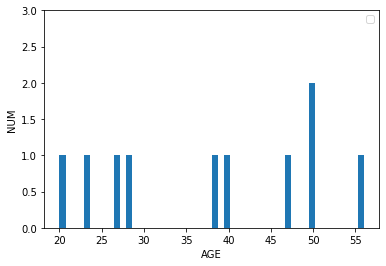

In [ ]:
plt.hist(age,bins=50)
plt.ylim([0,3])
plt.xlabel("AGE")
plt.ylabel("NUM")
plt.legend()

<ipython-input-32-d7ee8aa6bac3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[j] = 1
<ipython-input-32-d7ee8aa6bac3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[j] = 0


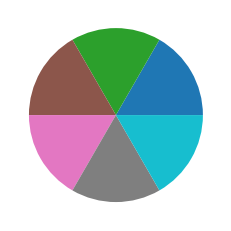

In [ ]:
gender = df1["SEX"]
#gender_for_graph
j=0
for i in gender:
  if i == 'F':
    gender[j] = 1
  else:
    gender[j] = 0
  j+=1

plt.pie(gender)
plt.show()

In [ ]:
#그룹화
group_by_sex = df1.groupby("SEX")
print(group_by_sex)

In [ ]:
for key, value in group_by_sex:
  print("KEY : ",key)
  print(value)

KEY :  0
   ID SEX  AGE     AREA
1   2   0   40  Kyengki
3   4   0   50    Seoul
4   5   0   27    Seoul
8   9   0   20  Incheon
KEY :  1
   ID SEX  AGE     AREA
0   1   1   50    Seoul
2   3   1   28     Jeju
5   6   1   23    Seoul
6   7   1   56  Kyengki
7   8   1   47    Seoul
9  10   1   38  Kyengki


In [ ]:
df1.groupby("SEX").sum()

,ID,AGE
SEX,,
0,20,137
1,35,242


In [ ]:
#새 열 만들기
df1["중년"] = df1["AGE"] > 40
df1["중년"] 

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7     True
8    False
9    False
Name: 중년, dtype: bool

In [ ]:
def age_name(Age):
  name = ""
  if Age > 40:
    name = "중장년"
  else:
    name = "청년"
  return name

In [ ]:
x = df1["AGE"]
df1["AGED"] = df1["AGE"].apply(lambda x : age_name(x)) #apply 함수는 여러 줄에 적용하기 위해 사용

df1["AGED"]

0    중장년
1     청년
2     청년
3    중장년
4     청년
5     청년
6    중장년
7    중장년
8     청년
9     청년
Name: AGED, dtype: object

In [ ]:
file2 = "/content/chipotle.tsv"
chipo = pd.read_csv(file2,sep = "\t")
print(chipo.shape)
print("----------------")
print(chipo.info())
#info의 Non_Null은 비결측치 즉 정상적으로 채워진 데이터의 개수이다
print("----------------")

In [ ]:
chipo.head(10)
chipo[["item_name","choice_description","item_price"]].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


In [ ]:
item_count = chipo["item_name"].value_counts()[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [ ]:
for idx, (val, cnt) in enumerate(item_count,items(),1):
  print("TOP",idx,":",val,cnt)

TypeError: ignored

(array([17.,  8.,  6.,  3.,  2.,  3.,  3.,  0.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  1.   ,  19.125,  37.25 ,  55.375,  73.5  ,  91.625, 109.75 ,
        127.875, 146.   , 164.125, 182.25 , 200.375, 218.5  , 236.625,
        254.75 , 272.875, 291.   , 309.125, 327.25 , 345.375, 363.5  ,
        381.625, 399.75 , 417.875, 436.   , 454.125, 472.25 , 490.375,
        508.5  , 526.625, 544.75 , 562.875, 581.   , 599.125, 617.25 ,
        635.375, 653.5  , 671.625, 689.75 , 707.875, 726.   ]),
 <BarContainer object of 40 artists>)

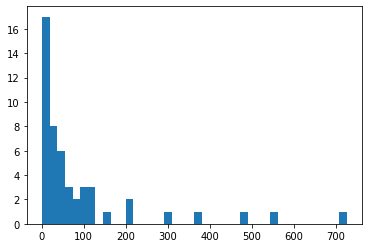

In [ ]:
plt.hist(item_count,bins=40)

#과제 
아이템과 주문개수의 총량 구하기
도움되는 깃허브
- github.com/yoonky200/

In [ ]:
order_count = chipo.groupby("item_name")['order_id'].count()
order_count
item_prices = chipo.groupby("item_price").count()
item_prices

In [9]:
item_count = chipo.groupby("item_name")['quantity'].count()
item_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [14]:
item_count.index #딕셔너리 키 부분
item_count.values #딕셔너리 값 부분

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [19]:
item_count_index = item_count.index.tolist()
len(item_count_index)

50

In [20]:
x= np.arange(len(item_count_index))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [21]:
order_cnt= item_count.values.tolist()
print(order_cnt)

[54, 66, 91, 11, 10, 25, 162, 2, 6, 104, 301, 68, 59, 7, 1, 6, 40, 726, 553, 47, 9, 110, 115, 211, 110, 479, 1, 22, 18, 43, 48, 31, 20, 2, 20, 27, 2, 101, 211, 368, 35, 4, 29, 55, 85, 95, 1, 6, 18, 7]


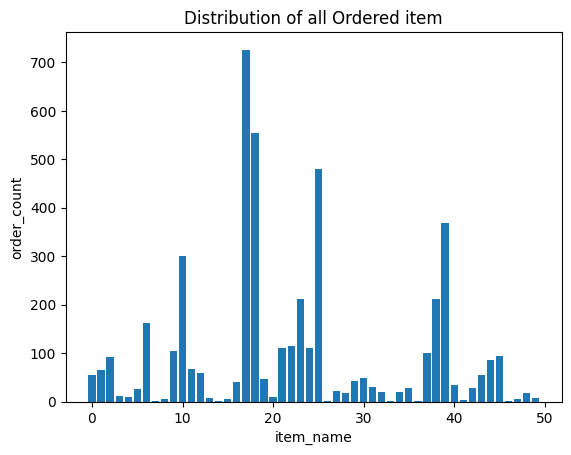

In [22]:
plt.bar(x,order_cnt)
plt.xlabel("item_name")
plt.ylabel("order_count")
plt.title("Distribution of all Ordered item")
plt.show()